# Clustering - Introduction (Agrupación - Introducción)

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

En contraste con el aprendizaje automático *supervisado*, el aprendizaje *no supervisado* se usa cuando no hay una "verdad básica" a partir de la cual entrenar y validar las predicciones de las etiquetas. La forma más común de aprendizaje no supervisado es la *clustering - agrupación*, que es conceptualmente similar a la *clasificación*, excepto que los datos de entrenamiento no incluyen valores conocidos para la predicción de la etiqueta de clase. La agrupación en clústeres funciona separando los casos de entrenamiento en función de las similitudes que se pueden determinar a partir de sus valores de características. Piénsalo de esta manera; las características numéricas de una entidad determinada se pueden considerar como coordenadas vectoriales que definen la posición de la entidad en el espacio n-dimensional. Lo que busca hacer un modelo de agrupamiento es identificar grupos, o *clusters (conglomerados)*, de entidades que están cerca unas de otras mientras están separadas de otros *clusters (conglomerados)*.

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

Por ejemplo, echemos un vistazo a un conjunto de datos que contiene medidas de diferentes especies de semillas de trigo.

> **Citation**: The seeds dataset used in the this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science).

> **Cita**: El conjunto de datos de semillas utilizado en este ejercicio fue publicado originalmente por el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin, y se puede descargar del repositorio de conjuntos de datos de la UCI (Dua, D. y Graff, C (2019).Repositorio de aprendizaje automático de UCI [http://archive.ics.uci.edu/ml].Irvine, CA: Universidad de California, Escuela de Información y Ciencias de la Computación)

In [3]:
import pandas as pd

# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')
data.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [4]:

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
74,16.82,15.51,0.8786,6.017,3.486,4.004
130,18.30,15.89,0.9108,5.979,3.755,2.837
182,12.19,13.36,0.8579,5.240,2.909,4.857
81,18.72,16.19,0.8977,6.006,3.857,5.324
110,18.45,16.12,0.8921,6.107,3.769,2.235
137,15.57,15.15,0.8527,5.920,3.231,2.640
88,21.18,17.21,0.8989,6.573,4.033,5.780
24,15.01,14.76,0.8657,5.789,3.245,1.791
100,16.41,15.25,0.8866,5.718,3.525,4.217
145,11.21,13.13,0.8167,5.279,2.687,6.169


As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Como puede ver, el conjunto de datos contiene seis puntos de datos (o *características*) para cada instancia (*observación*) de una semilla. Entonces podría interpretarlos como coordenadas que describen la ubicación de cada instancia en un espacio de seis dimensiones.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

Ahora, por supuesto, el espacio de seis dimensiones es difícil de visualizar en un mundo tridimensional, o en una trama de dos dimensiones; así que aprovecharemos una técnica matemática llamada *Análisis de componentes principales* (PCA) para analizar las relaciones entre las características y resumir cada observación como coordenadas para dos componentes principales; en otras palabras, traduciremos la característica de seis dimensiones valores en coordenadas bidimensionales.

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

Ahora que tenemos los puntos de datos traducidos a dos dimensiones, podemos visualizarlos en un gráfico:

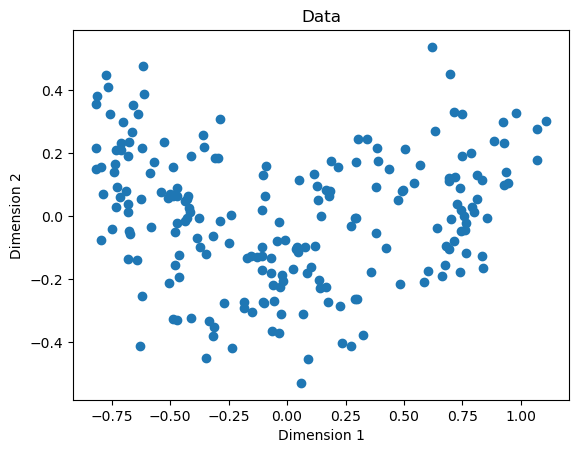

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

Es de esperar que pueda ver al menos dos, posiblemente tres, grupos razonablemente distintos de puntos de datos; pero aquí radica uno de los problemas fundamentales con la agrupación en clústeres: sin etiquetas de clase conocidas, ¿cómo sabe en cuántos clústeres debe separar sus datos?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

Una forma en que podemos intentar averiguarlo es usar una muestra de datos para crear una serie de modelos de agrupamiento con un número creciente de grupos y medir qué tan estrechamente se agrupan los puntos de datos dentro de cada grupo. Una métrica que se usa a menudo para medir esta estrechez es la *suma de cuadrados dentro del grupo* (WCSS), con valores más bajos que significan que los puntos de datos están más cerca. A continuación, puede trazar el WCSS para cada modelo.

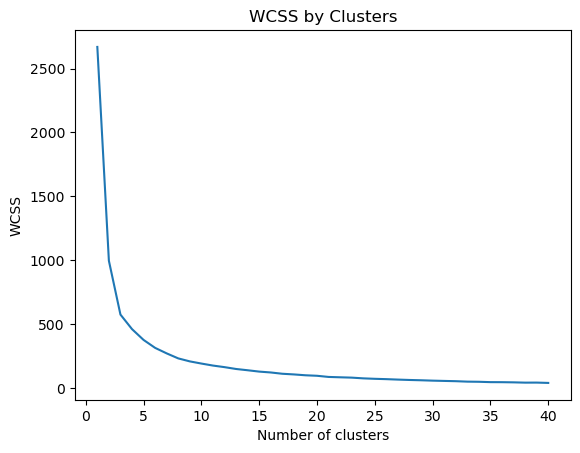

In [11]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
max_range = 41 #se prueba con 11,21,31,41, 101 ...misma tendencia
for i in range(1, max_range):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, max_range), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

La gráfica muestra una gran reducción en WCSS (por lo tanto, mayor *estrechez*) a medida que el número de grupos aumenta de uno a dos, y una reducción más notable de dos a tres grupos. Después de eso, la reducción es menos pronunciada, lo que da como resultado un "codo" en el gráfico de alrededor de tres grupos. Esta es una buena indicación de que hay dos o tres grupos de puntos de datos razonablemente bien separados.

## Summary - Resumen

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. In the next notebook, we will look at two ways of labelling the data automatically.

Aquí analizamos qué significa la agrupación en clústeres y cómo determinar si la agrupación en clústeres podría ser apropiada para sus datos. En el siguiente cuaderno, veremos dos formas de etiquetando los datos automáticamente.